In [21]:
# Import dependencies
import os
import pandas as pd
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from transformers import CLIPProcessor, CLIPModel, AdamW, ViTForImageClassification, ViTFeatureExtractor
from diffusers import StableDiffusionPipeline, DDPMScheduler
import openai

In [22]:
from datasets import load_dataset

# Load the DiffusionDB dataset
dataset = load_dataset("poloclub/diffusiondb", 'large_random_1k')

# Preview the dataset (assuming it has a 'prompts' column)
print(dataset['train'][0])  # Adjust based on your dataset structure


{'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=768x768 at 0x7F7E06117790>, 'prompt': 'a! chicken headed human, criminal mugshot ', 'seed': 389156947, 'step': 150, 'cfg': 7.0, 'sampler': 'k_lms', 'width': 768, 'height': 768, 'user_name': 'da0e55d25988aad2cc0e5c8f3146d0b18c8df6b5f5eb475ebcff4f0dd2f0951b', 'timestamp': datetime.datetime(2022, 8, 12, 20, 41, tzinfo=<UTC>), 'image_nsfw': 0.03313660994172096, 'prompt_nsfw': 0.5531444549560547}


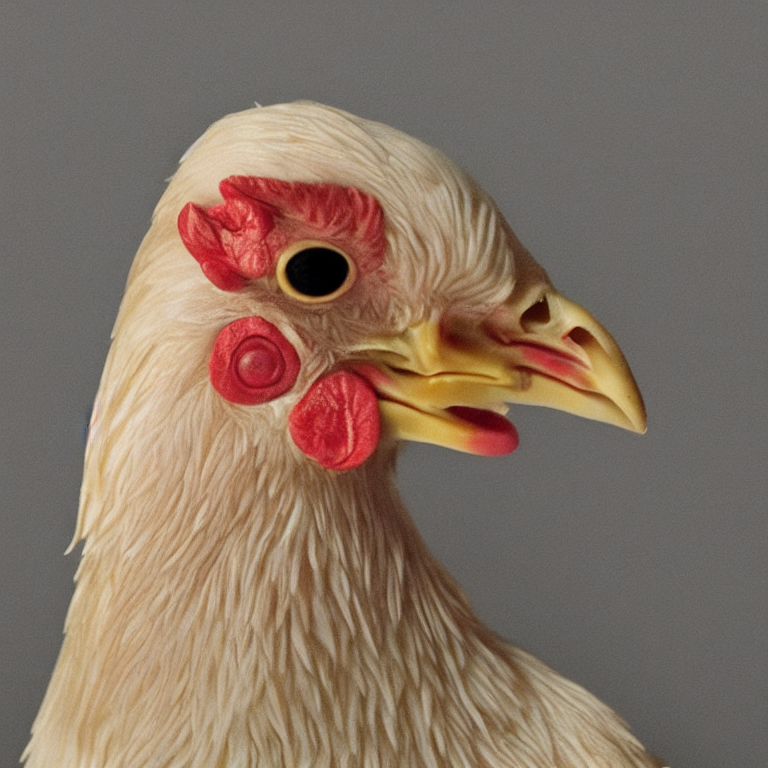

In [23]:
dataset['train'][0]['image']

In [24]:
# Load the Stable Diffusion model
stable_diffusion = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
def generate_image(prompt):
    with torch.no_grad():
        image = stable_diffusion(prompt)["sample"][0]
    return image


In [26]:
import gradio as gr

# Define the prediction function for classification
def classify_image(image):
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()
    return f"Predicted Class: {predicted_class}"

# Combine the image generation and classification functions
def generate_and_classify(prompt):
    # Generate an image from the prompt
    image = generate_image(prompt)
    
    # Classify the generated image
    class_label = classify_image(image)
    
    return image, class_label

# Create a Gradio interface
iface = gr.Interface(
    fn=generate_and_classify,
    inputs=gr.Textbox(label="Enter a prompt"),  # Updated input for prompt
    outputs=[gr.Image(type="pil"), gr.Textbox(label="Classification")],  # Updated outputs
    title="Stable Diffusion Image Generation and Classification",
    description="Enter a prompt to generate an image and see its predicted class."
)

# Launch the interface
iface.launch(share =True)


* Running on local URL:  http://127.0.0.1:7866
* Running on public URL: https://87eb2a6a4988e47e96.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [27]:
#generated_images = []
output_dir = "generated_images/"  # Directory to save images

# Iterate through the dataset prompts (adjust according to your dataset structure)
for example in dataset['train']:
    prompt = example['prompt']  # Adjust based on your dataset's column name
    image = generate_image(prompt)
    generated_images.append(image)
    
    # Save the generated image
    image.save(f"{output_dir}{prompt[:10].replace(' ', '_')}.png")  # Save with a unique filename


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display generated images
for img in generated_images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()
